# Stcok ML analysis

In this text we try to investigate how Machine Learning can do for price prediciton in stock market or look at a very general idea that what kind of data or pattern we can observe in these type of datas.

## Loading data

We first load the last prices from *IEXTrading* data basis. If you run this step for first time it may take a minute to finish but ig you already executed this step in your last runs, a proper csv file has been created and you can directly got to next step that reads the data from your local directory.

In [149]:
import urllib, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NasDaq = ['ATVI','ADBE' , 'AMD', 'ALGN', 'ALXN' , 'AMZN','AMGN','AAL','ADI','AAPL','AMAT','ASML','ADSK','ADP','AVGO'
          ,'BIDU','BIIB' , 'BMRN' , 'CDNS' , 'CELG' , 'CERN' , 'CHKP','CHTR','CTRP' ,'CTAS','CSCO','CTXS','CMCSA'
          ,'COST','CSX','CTSH','DLTR','EA','EBAY','EXPE','FAST','FB','FISV','FOX','FOXA','GILD','GOOG','GOOGL','HAS'
          ,'HSIC','ILMN','INCY','INTC','INTU','ISRG','IDXX','JBHT','JD','KLAC','KHC','LRCX','LBTYA','LBTYK','LULU'
          ,'MELI','MAR','MCHP','MDLZ','MNST','MSFT','MU','MXIM','MYL','NTAP','NFLX','NTES','NVDA','NXPI','ORLY','PAYX'
          ,'PCAR','BKNG','PYPL','PEP','QCOM','REGN','ROST','SIRI','SWKS','SBUX','SYMC','SNPS','TTWO','TSLA'
          ,'TXN','TMUS','ULTA','UAL','VRSN','VRSK','VRTX','WBA','WDC','WDAY','WLTW','WYNN','XEL','XLNX']
NasDaq.sort()

def getPrice (df):
    n = len(df)
    price = np.zeros(n)
    for i in range (n):
        price[i] = df.iloc[i]['close']
    return price

price = {}
    
for company in NasDaq:
    url = "https://api.iextrading.com/1.0/stock/" + company + "/batch?types=chart&range=2y"
    response = urllib.request.urlopen(url)
    df = pd.DataFrame(data = json.loads(response.read())).chart
    price[company] = getPrice(df)

df = pd.DataFrame(data = price)
df.to_csv('stock_data.csv', sep=',')

In [25]:
import urllib, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NasDaq = ['ATVI','ADBE' , 'AMD', 'ALGN', 'ALXN' , 'AMZN','AMGN','AAL','ADI','AAPL','AMAT','ASML','ADSK','ADP','AVGO'
          ,'BIDU','BIIB' , 'BMRN' , 'CDNS' , 'CELG' , 'CERN' , 'CHKP','CHTR','CTRP' ,'CTAS','CSCO','CTXS','CMCSA'
          ,'COST','CSX','CTSH','DLTR','EA','EBAY','EXPE','FAST','FB','FISV','FOX','FOXA','GILD','GOOG','GOOGL','HAS'
          ,'HSIC','ILMN','INCY','INTC','INTU','ISRG','IDXX','JBHT','JD','KLAC','KHC','LRCX','LBTYA','LBTYK','LULU'
          ,'MELI','MAR','MCHP','MDLZ','MNST','MSFT','MU','MXIM','MYL','NTAP','NFLX','NTES','NVDA','NXPI','ORLY','PAYX'
          ,'PCAR','BKNG','PYPL','PEP','QCOM','REGN','ROST','SIRI','SWKS','SBUX','SYMC','SNPS','TTWO','TSLA'
          ,'TXN','TMUS','ULTA','UAL','VRSN','VRSK','VRTX','WBA','WDC','WDAY','WLTW','WYNN','XEL','XLNX']
NasDaq.sort()

df= pd.read_csv('stock_data.csv')

We can plot the evoloution of all prices :

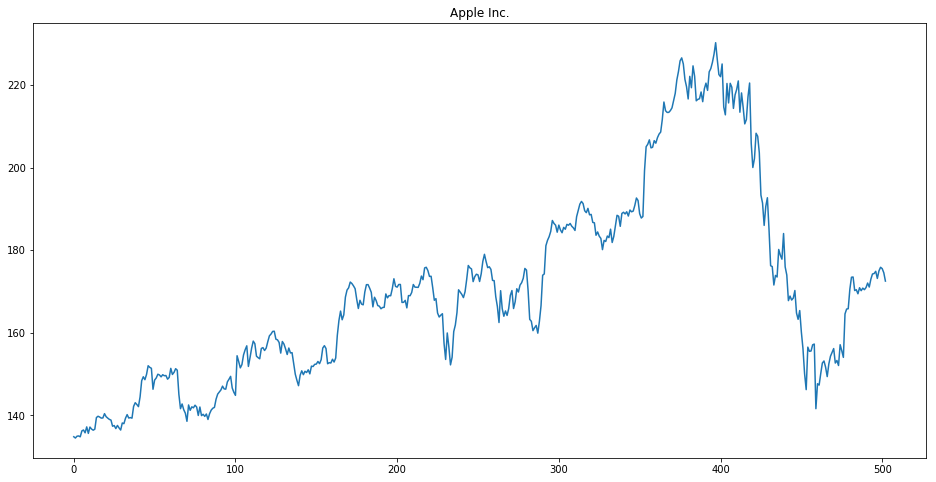

In [150]:
def mplot (price , name=" "):
    plt.figure(figsize=(16,8))
    plt.title(name)
    plt.plot (range(len(price)) , price)
    plt.show()

mplot (df.AAPL , name ="Apple Inc." )

### Simple Linear Regression 
We aim to look at different analysis one can apply for these type of datas. For example, as a first quesiton we might ask, 

#### Q1

can we write a price of given stock, let say Google (with Nasdaq `googl`), as a linear combination of other stock prices. 

For answering that, we apply a simple linear regression model. Here we go:

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def myLR (X , y , name , samplenumber=255):
    
    
    # We forget the fact they data samples are ordered and they are time series
    #X_train, X_test, y_train, y_test = train_test_split(X, y
    #                                                    , test_size=0.2, random_state=0)

    X_train = X[0:samplenumber , :]
    X_test = X[samplenumber: , :]
    y_train = y[0:samplenumber]
    y_test = y[samplenumber:]

    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(16,8))
    #plt.title(name)
    plt.plot (range(len(y)) , np.append(y_train , y_test) )
    plt.plot (range(len(y)) , np.append(y_train , y_pred) )
    plt.show()
    print("We can predict the stock of company " + name 
     + " with linear regression and the score of the prediction is " + str(score)
     + ".")

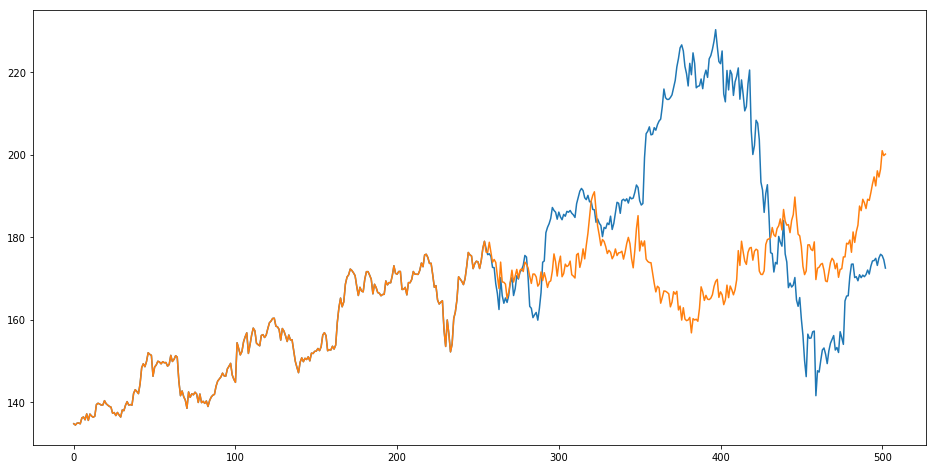

We can predict the stock of company AAPL with linear regression and the score of the prediction is -0.7248890470131264.


In [194]:
name = 'AAPL'
y = np.array ( df.loc[:,[name]] )
X = np.array ( df.loc[:,[company for company in NasDaq if company !=name]] )
myLR(X,y,name)

Interesting, non ?! It means with linear regression we cannot do that much prediction about the behaviour of stocks. Let us play a bit around. Let us raise this new question:

#### Q2

If we know the state of the market for today (the prices of the sotcks) but the price of a given stock, and if we know the price of the day before of this stock, can we predict something ?


Let's build our data to answer this question:


In [195]:
def myLaggedLR (X , y , name , k=1 , samplenumber=255 ):
    a , b = X.shape
    X_new = np.zeros ([a-k , b+k])
    for i in range ( k,  len (X) ):
        X_new[i-k] = np.append(X[i] , y[i-k:i])
    y_new = y[k:] 
    myLR (X_new , y_new, name , samplenumber)

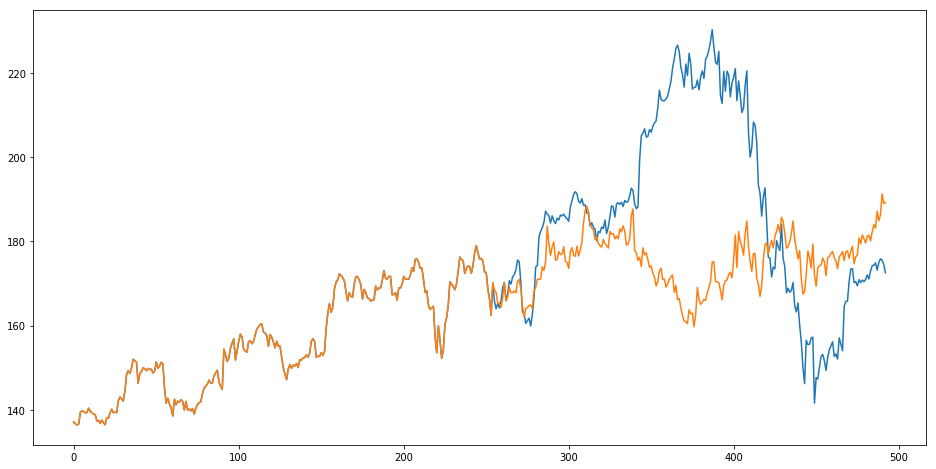

We can predict the stock of company AAPL with linear regression and the score of the prediction is -0.49326172930356704.


In [211]:
name = 'AAPL'
y = np.array ( df.loc[:,[name]] )
X = np.array ( df.loc[:,[company for company in NasDaq if company !=name]] )
myLaggedLR (X , y , name , k=10)